In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "C:\\Users\\Asus\\Downloads\\Student_Performance.csv"

In [3]:
data_all = pd.read_csv(path)

In [4]:
data_all

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


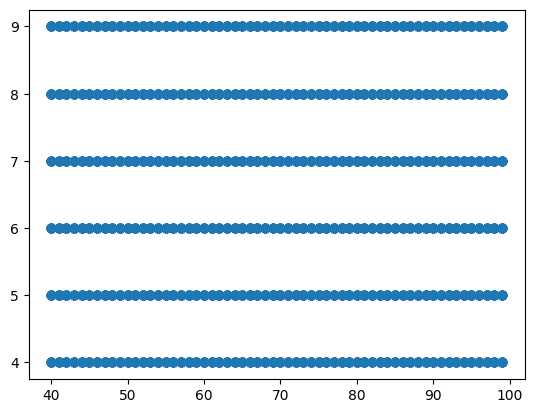

In [5]:
plt.scatter(data_all["Previous Scores"], data_all["Sleep Hours"])
plt.show()

In [6]:
eA = data_all.drop("Extracurricular Activities", axis = 1)

In [7]:
eA

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91.0
1,4,82,4,2,65.0
2,8,51,7,2,45.0
3,5,52,5,2,36.0
4,7,75,8,5,66.0
...,...,...,...,...,...
9995,1,49,4,2,23.0
9996,7,64,8,5,58.0
9997,6,83,8,5,74.0
9998,9,97,7,0,95.0


In [8]:
label = eA["Previous Scores"]
label

0       99
1       82
2       51
3       52
4       75
        ..
9995    49
9996    64
9997    83
9998    97
9999    74
Name: Previous Scores, Length: 10000, dtype: int64

In [9]:
X_train = eA[:500]
X_test = eA[500:]
Y_train = label[:500]
Y_test = label[500:] 

In [10]:
u = np.mean(eA, axis = 0)
std = np.std(eA, axis = 0)
X_train = (X_train-u)/std
X_test = (X_test-u)/std

In [11]:
X_train, X_test

(     Hours Studied  Previous Scores  Sleep Hours  \
 0         0.775188         1.704176     1.456205   
 1        -0.383481         0.723913    -1.492294   
 2         1.161410        -1.063626     0.276805   
 3         0.002742        -1.005963    -0.902594   
 4         0.775188         0.320275     0.866505   
 ..             ...              ...          ...   
 495       0.775188        -0.141025     0.276805   
 496       1.547633         1.531188    -0.902594   
 497      -0.383481        -1.409601    -0.312895   
 498      -0.383481        -0.198688     1.456205   
 499       0.388965         1.473526     0.866505   
 
      Sample Question Papers Practiced  Performance Index  
 0                           -1.249754           1.862167  
 1                           -0.900982           0.508818  
 2                           -0.900982          -0.532220  
 3                           -0.900982          -1.000687  
 4                            0.145333           0.560870  
 .

In [12]:
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)

In [13]:
X_train, X_test

(array([[ 0.77518771,  1.70417565,  1.45620461, -1.24975394,  1.86216688],
        [-0.38348058,  0.72391268, -1.49229423, -0.90098215,  0.50881766],
        [ 1.16141048, -1.06362569,  0.27680507, -0.90098215, -0.5322202 ],
        ...,
        [-0.38348058, -1.40960086, -0.3128947 ,  1.19164856, -1.36505048],
        [-0.38348058, -0.19868777,  1.45620461, -0.55221037, -0.37606452],
        [ 0.38896495,  1.47352554,  0.86650484,  0.84287677,  1.49780363]]),
 array([[-0.76970335, -1.06362569, -0.3128947 , -0.20343858, -1.15684291],
        [ 0.38896495,  1.24287543, -1.49229423, -1.59852572,  1.39369985],
        [ 0.77518771,  1.01222532,  0.86650484,  1.19164856,  1.34164795],
        ...,
        [ 0.38896495,  0.7815752 ,  0.86650484,  0.1453332 ,  0.9772847 ],
        [ 1.54763324,  1.5888506 ,  0.27680507, -1.59852572,  2.07037446],
        [ 0.77518771,  0.26261245,  0.86650484, -1.24975394,  0.45676577]]))

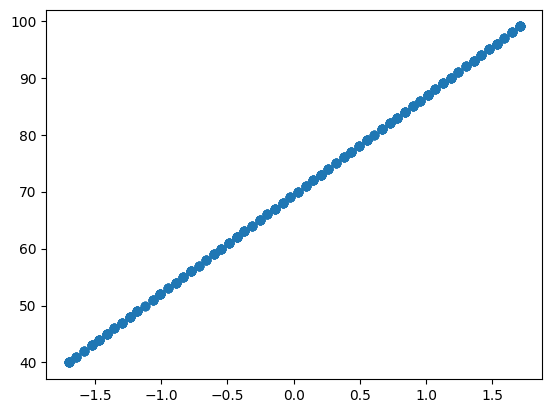

In [14]:
plt.scatter(X_train[:,1], Y_train)
plt.show()

In [15]:
ones=np.ones((X_train.shape[0],1))
ones.shape
X_train=np.hstack((ones,X_train))

In [16]:
def hypothesis(X,theta):   
    y_=0
    n=X.shape[0]
    for i in range(n):
        y_+=theta[i]*X[i]
    return y_   

In [17]:
def cost(X,Y,theta):
    m=X.shape[0]
    total_error=0
    for i in range(m):
        y_p=hypothesis(X[i],theta)
        total_error+= (y_p - Y[i])**2
    return total_error/m

In [18]:
def gradient(X,Y,theta):
    m,n = X.shape  
    grad= np.zeros((n,))
    for j in range(n):
        for i in range(m):
            x=X[i]
            y_p=hypothesis(X[i],theta)
            y_t=Y[i]
            grad[j]+= (y_p-y_t)*x[j]
    return grad/m

In [19]:
def gradient_descent(X, Y , learning_rate=0.001, max_steps=2000):
    m,n = X.shape    
    theta= np.zeros((n,))
    cost_epoch=[]
    for i in range(max_steps):
        grad=gradient(X,Y, theta)
        e=cost(X,Y, theta)
        cost_epoch.append(e)
        for j in range(n):
            theta[j]=theta[j]-learning_rate*grad[j]
    return theta, cost_epoch

In [20]:
theta, cost_epoch= gradient_descent(X_train, Y_train ,learning_rate=0.1 ,max_steps=200)

In [21]:
theta

array([69.46705348, -2.75143186, 10.74068114, -0.2871993 , -0.21749775,
        7.13174059])

In [22]:
cost_epoch

[np.float64(5163.386),
 np.float64(4127.112515292744),
 np.float64(3307.1452397923704),
 np.float64(2655.4742783804627),
 np.float64(2135.723048733417),
 np.float64(1720.009694659633),
 np.float64(1386.7520313414911),
 np.float64(1119.1059052331632),
 np.float64(903.8353065968727),
 np.float64(730.4816216796173),
 np.float64(590.7436871411754),
 np.float64(478.00894593499214),
 np.float64(386.9947165391269),
 np.float64(313.47096242581677),
 np.float64(254.04424452020683),
 np.float64(205.9881851319615),
 np.float64(167.10967675390395),
 np.float64(135.64281589268342),
 np.float64(110.16450729352754),
 np.float64(89.52711337577671),
 np.float64(72.80457979564261),
 np.float64(59.249259515740064),
 np.float64(48.25725846730576),
 np.float64(39.3405868588846),
 np.float64(32.104757241340515),
 np.float64(26.230749171551437),
 np.float64(21.46047930660992),
 np.float64(17.585088711297672),
 np.float64(14.43549632821503),
 np.float64(11.874776713362023),
 np.float64(9.792007235412896),
 np

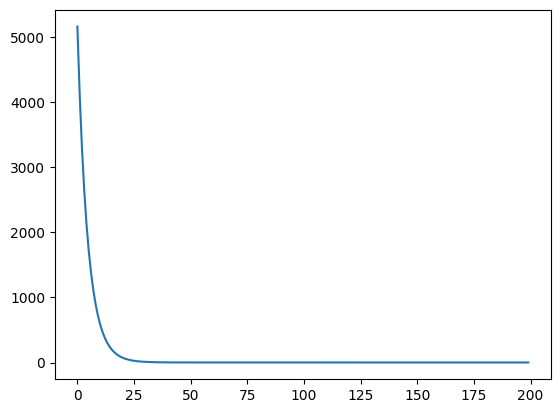

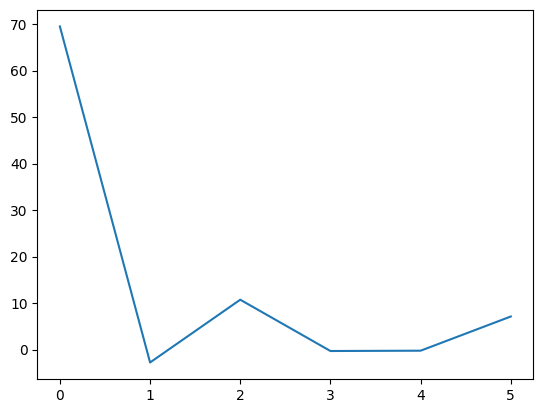

In [23]:
plt.plot(cost_epoch)
plt.show()
plt.plot(theta)